In [90]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.InteractiveSession()

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [93]:
data = pd.read_csv('/content/drive/My Drive/DL-HW1/Q1_train.csv')

In [94]:
#Getting the labels
labels = data.iloc[:,0]
data.drop(columns = ['label'],inplace = True)
#standarizing
data = data/255

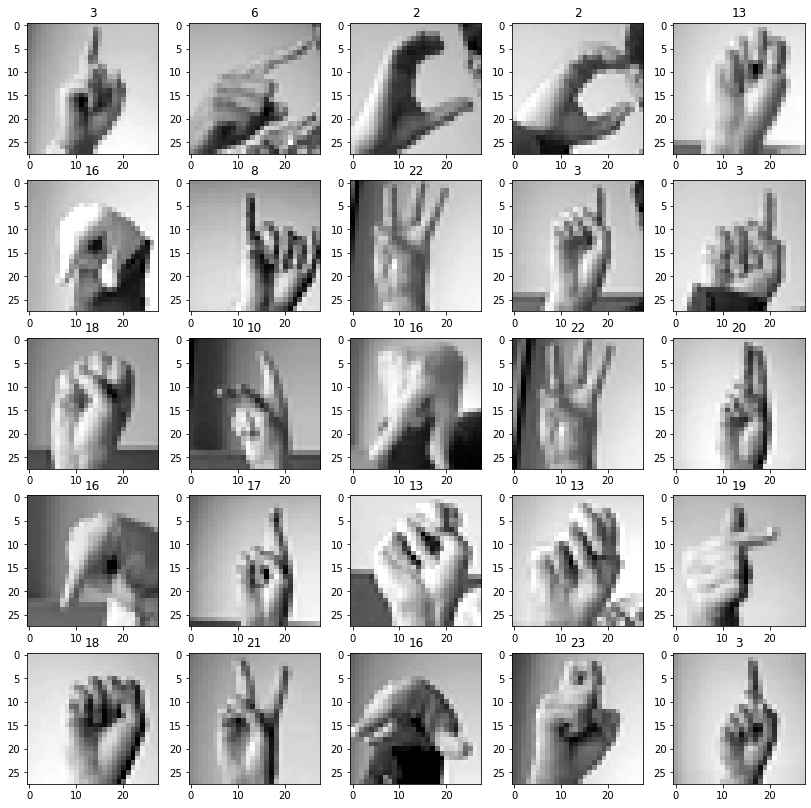

In [82]:
fig , ax = plt.subplots(nrows=5, ncols= 5, figsize = (14, 14))
ax = ax.flatten()
for i, a in enumerate(ax):   
    a.imshow(data.values[i][:].reshape(28, 28), cmap = 'gray')
    a.set(title = str(labels[i]))

In [95]:
#splitting the data
X_train, X_validation, y_train, y_validation = train_test_split(data, labels,test_size = 0.2, random_state = 123)

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_validation = lb.transform(y_validation)

In [98]:
num_classes = y_train.shape[1]
num_features = X_train.shape[1]
num_output = y_train.shape[1]
num_layers_0 = 512
num_layers_1 = 256
starter_learning_rate = 0.001
regularizer_rate = 0.1

In [99]:
input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")
input_y = tf.placeholder('float32',shape = (None,num_classes),name='input_Y')
# for dropout layer
#keep_prob = tf.placeholder(tf.float32)

In [100]:
# Weights initialized by random normal function with std_dev = sqrt(4/(number of input features+ number of output features)
weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(tf.sqrt(4/float(num_features + num_layers_0 )))))
bias_0 = tf.Variable(tf.random_normal([num_layers_0]))
weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(tf.sqrt(4/float(num_layers_0 + num_layers_1)))))
bias_1 = tf.Variable(tf.random_normal([num_layers_1]))
weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_output], stddev=(1/tf.sqrt(float(num_layers_1)))))
bias_2 = tf.Variable(tf.random_normal([num_output]))

In [101]:
# Initializing weigths and biases
hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0,weights_1)+bias_1)
predicted_y = tf.sigmoid(tf.matmul(hidden_output_1,weights_2) + bias_2)

In [102]:
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_y,labels=input_y))

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [103]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_y,labels=input_y))

In [122]:
# Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
# Adam optimzer for finding the right weight
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,
                                                                         bias_0,bias_1,bias_2])
optimizer_sgd = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [105]:
correct_prediction = tf.equal(tf.argmax(y_train,1), tf.argmax(predicted_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [118]:
X_train, X_validation= X_train.values, X_validation.values

In [120]:
# Training parameters
batch_size = 256
epochs=14
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]][:],
                          input_y: y_train[arr[index:index+batch_size]][:]} )
    training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
                                                         input_y: y_train}))
    training_loss.append(s.run(loss, {input_X: X_train, 
                                      input_y: y_train}))
    
    # Evaluation of model
    testing_accuracy.append(accuracy_score(y_validation.argmax(1), 
                            s.run(predicted_y, {input_X: X_validation}).argmax(1)))
    print("Epoch:{0}, Train loss: {1:.2f} Train acc: {2:.3f}, Test acc:{3:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch],
                                                                   testing_accuracy[epoch]))

Epoch:0, Train loss: 2.62 Train acc: 0.394, Test acc:0.388
Epoch:1, Train loss: 2.51 Train acc: 0.516, Test acc:0.521
Epoch:2, Train loss: 2.45 Train acc: 0.591, Test acc:0.587
Epoch:3, Train loss: 2.42 Train acc: 0.664, Test acc:0.654
Epoch:4, Train loss: 2.39 Train acc: 0.643, Test acc:0.635
Epoch:5, Train loss: 2.38 Train acc: 0.704, Test acc:0.696
Epoch:6, Train loss: 2.35 Train acc: 0.756, Test acc:0.751
Epoch:7, Train loss: 2.33 Train acc: 0.795, Test acc:0.788
Epoch:8, Train loss: 2.32 Train acc: 0.813, Test acc:0.806
Epoch:9, Train loss: 2.31 Train acc: 0.837, Test acc:0.840
Epoch:10, Train loss: 2.30 Train acc: 0.853, Test acc:0.852
Epoch:11, Train loss: 2.32 Train acc: 0.837, Test acc:0.834
Epoch:12, Train loss: 2.31 Train acc: 0.819, Test acc:0.818
Epoch:13, Train loss: 2.29 Train acc: 0.899, Test acc:0.898


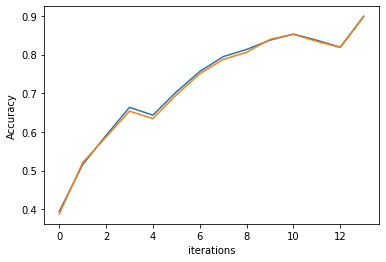

Train Accuracy: 0.90
Test Accuracy:0.90


In [121]:
iterations = list(range(epochs))
plt.plot(iterations, training_accuracy, label='Train')
plt.plot(iterations, testing_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('iterations')
plt.show()
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))

In [123]:
# Training parameters
batch_size = 128
epochs=14
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer_sgd, {input_X: X_train[arr[index:index+batch_size]][:],
                          input_y: y_train[arr[index:index+batch_size]][:]} )
    training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
                                                         input_y: y_train}))
    training_loss.append(s.run(loss, {input_X: X_train, 
                                      input_y: y_train}))
    
    # Evaluation of model
    testing_accuracy.append(accuracy_score(y_validation.argmax(1), 
                            s.run(predicted_y, {input_X: X_validation}).argmax(1)))
    print("Epoch:{0}, Train loss: {1:.2f} Train acc: {2:.3f}, Test acc:{3:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch],
                                                                   testing_accuracy[epoch]))

Epoch:0, Train loss: 3.21 Train acc: 0.033, Test acc:0.030
Epoch:1, Train loss: 3.20 Train acc: 0.033, Test acc:0.031
Epoch:2, Train loss: 3.19 Train acc: 0.033, Test acc:0.032
Epoch:3, Train loss: 3.18 Train acc: 0.035, Test acc:0.034
Epoch:4, Train loss: 3.18 Train acc: 0.035, Test acc:0.034
Epoch:5, Train loss: 3.17 Train acc: 0.038, Test acc:0.036
Epoch:6, Train loss: 3.16 Train acc: 0.054, Test acc:0.051
Epoch:7, Train loss: 3.16 Train acc: 0.081, Test acc:0.074
Epoch:8, Train loss: 3.16 Train acc: 0.100, Test acc:0.090
Epoch:9, Train loss: 3.15 Train acc: 0.107, Test acc:0.098
Epoch:10, Train loss: 3.15 Train acc: 0.113, Test acc:0.108
Epoch:11, Train loss: 3.14 Train acc: 0.117, Test acc:0.113
Epoch:12, Train loss: 3.14 Train acc: 0.120, Test acc:0.116
Epoch:13, Train loss: 3.14 Train acc: 0.126, Test acc:0.119
